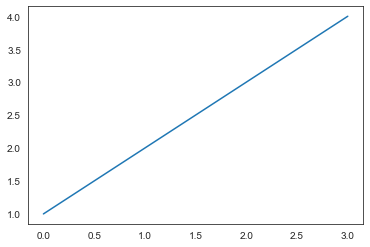

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from pprint import pprint
%matplotlib inline
sns.set_style("white")
plt.plot(np.arange(1,5));

In [2]:
path_to_files = '../data/YAGO3-10-DR/'
project = "YAGO3-10-DR"
df_train = pd.read_csv(path_to_files+"train.txt", sep='\t', header=None, dtype='str')
df_train.columns = ['head', 'rel', 'tail']
# in case no valid.txt being there
try:
    df_eval = pd.read_csv(path_to_files+"valid.txt", sep='\t', header=None, dtype='str')
    df_eval.columns = ['head', 'rel', 'tail']
except FileNotFoundError:
    df_eval = df_train.copy()

df_test = pd.read_csv(path_to_files+"test.txt", sep='\t', header=None, dtype='str')
df_test.columns = ['head', 'rel', 'tail']
for cur_df in [df_train, df_eval, df_test]:
    #cur_df = cur_df.astype(str)
    if "YAGO" in path_to_files:
        for col in cur_df.columns:
            cur_df[col] = cur_df[col] + "_YAGO"

already_seen_triples = set(df_train.to_records(index=False).tolist() + df_eval.to_records(index=False).tolist())
print(f'Total: {len(already_seen_triples)} triples in train + eval!)')
print(f'In train: {len(df_train)}')

Total: 735915 triples in train + eval!)
In train: 732556


In [3]:
if "YAGO" in path_to_files:
    df_test.to_csv(path_to_files + "test_YAGO.txt", index=False, header=False, sep='\t')
    df_eval.to_csv(path_to_files + "valid_YAGO.txt", index=False, header=False, sep='\t')


In [4]:
unique_rels = sorted(list(df_train['rel'].unique()))
print(f'# of unique rels: {len(unique_rels)}')
df_train['head_type'] = "head__" + df_train['rel'].astype(str)
df_train['tail_type'] = "tail__" + df_train['rel'].astype(str)

# of unique rels: 36


In [5]:
from collections import defaultdict
head_dict = df_train.groupby('head')['head_type'].agg(list).to_dict()
tail_dict = df_train.groupby('tail')['tail_type'].agg(list).to_dict()
total_dict = defaultdict(set)

KeyboardInterrupt: 

In [ ]:
for ent, values in head_dict.items():
    total_dict[ent] = total_dict[ent].union(values)
for ent, values in tail_dict.items():
    total_dict[ent] = total_dict[ent].union(values)
print(f'# of unique ents: {len(total_dict)}')

In [ ]:
del df_train['head_type']
del df_train['tail_type']